In [ ]:
!pip install active-semi-supervised-clustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn import datasets, metrics
from active_semi_clustering.semi_supervised.pairwise_constraints import PCKMeans
from active_semi_clustering.active.pairwise_constraints import ExampleOracle, ExploreConsolidate, MinMax
import pandas as pd
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
from enum import auto
from sklearn.manifold import TSNE

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X_lda = pd.read_pickle("/content/drive/MyDrive/Colab Notebooks/ATIML/vect_tfidf_2322.pkl")

In [ ]:
ml_pairwise_constraints = [(495, 498), (494, 495), (495, 496), (183, 343), (33, 264), (669, 733), (1339, 1381), (1258, 1353), (1515, 1526), (1373, 1452), (1199, 1232), (1004, 1007), (114, 189), (173, 326), (113, 188), (50, 56), (997, 1000), (247, 334), (1515, 1518), (56, 58), (1313, 1316), (1017, 1025), (264, 270), (986, 992), (1296, 1308), (188, 351), (34, 38), (326, 420), (1339, 1383), (274, 275), (928, 979), (1258, 1356), (34, 39), (511, 516), (1439, 1491), (1346, 1386), (1355, 1424), (1382, 1508), (1343, 1443), (1443, 1509), (120, 277), (349, 351), (1216, 1290), (1377, 1461), (1296, 1416), (2232, 2237), (115, 116), (1320, 1351), (28, 114), (194, 195)]
cl_pairwise_constraints = [(678, 1774), (494, 1013), (92, 1401), (397, 1667), (791, 886), (999, 2244), (48, 963), (978, 1662), (496, 1013), (188, 1066), (498, 1614), (761, 1414), (710, 1170), (805, 1913), (1382, 2245), (1067, 2214), (63, 999), (851, 1657), (1344, 2171), (524, 2066), (839, 1866), (433, 1096), (538, 1134), (1003, 2256), (798, 1292), (340, 1562), (73, 2231), (106, 734), (327, 1671), (871, 1813), (559, 1488), (159, 1112), (575, 1736), (974, 2316), (321, 1119), (495, 1614), (318, 1475), (974, 1949), (916, 1831), (913, 2080), (538, 1044), (935, 2251), (974, 2140), (760, 1974), (935, 1321), (974, 1973), (935, 2035), (57, 1061), (145, 642), (528, 1436)]

In [ ]:
X_Main = X_lda.toarray()

In [ ]:
clusterer = PCKMeans(n_clusters=6)
clusterer.fit(X_Main, ml=ml_pairwise_constraints, cl=cl_pairwise_constraints)
cluster_labels = clusterer.labels_
# raise EmptyClustersException

In [ ]:
"""clusterer = PCKMeans(n_clusters=14)
clusterer.fit(X_lda)
cluster_labels = clusterer.labels_"""

In [ ]:
#davies_bouldin_score(X_lda, clusterer.labels_)

4.237586137378417

For n_clusters = 6 The average silhouette_score is : 0.53920233


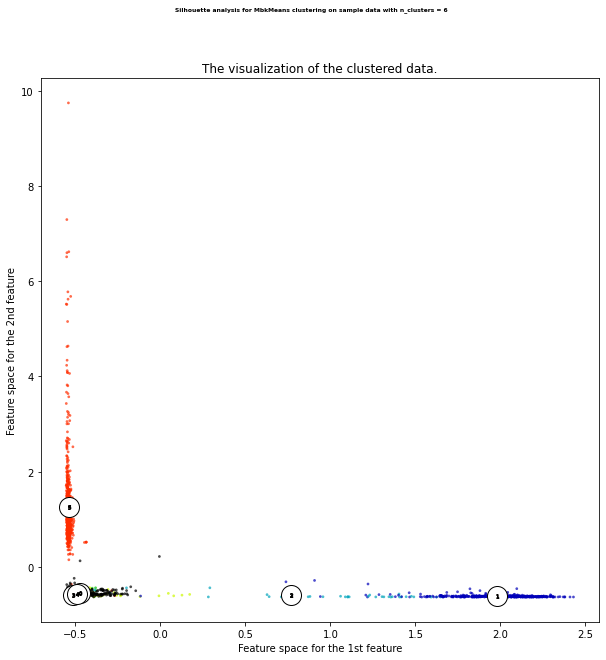

In [ ]:
fig, (ax2) = plt.subplots(1)
fig.set_size_inches(10, 10)
no_of_clusters = 6
silhouette_avg = silhouette_score(X_lda, cluster_labels)

print(
    "For n_clusters =",
    no_of_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

sample_silhouette_values = silhouette_samples(X_lda, cluster_labels)

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / no_of_clusters)

ax2.scatter(
    X_lda[:, 0], X_lda[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=400,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=14, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for MbkMeans clustering on sample data with n_clusters = %d"
    % no_of_clusters,
    fontsize=no_of_clusters,
    fontweight="bold",
)

plt.show()

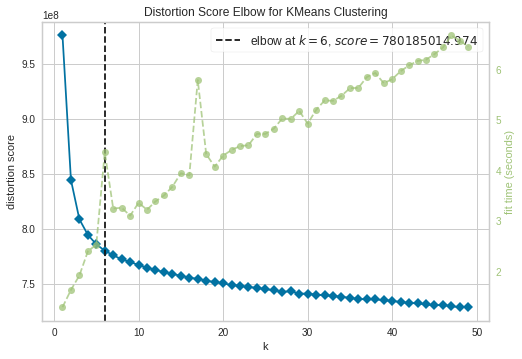

In [ ]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X_lda)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure